# Imports

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

In [81]:
df = pd.read_csv('logicimmo - Copie.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [83]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []
mean_error_list = []

# Modèles  :

### Regression linéaire 

In [84]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.8353222993179812

In [85]:
cross_val_score(model_lin_reg, X, y, cv=5)

array([  0.79090888, -83.48100222,   0.78531564,   0.83156989,
        -2.8694372 ])

In [86]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [87]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  143753.99119615837
RMSE :  308216.8666587707
median absolut error :  79723.21237537265


In [88]:
MAE_lin_reg = mean_absolute_error(y_test,y_pred)
RMSE_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_lin_reg = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_lin_reg)
model_list.append("Regression \nLineaire")
RMSE_list.append(RMSE_lin_reg)
median_abs_err_list.append(median_abs_err_lin_reg)

<function matplotlib.pyplot.show(close=None, block=None)>

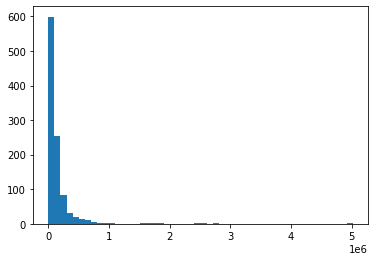

In [89]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [90]:
cross_val_score(model_lin_reg, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152884.21362369, -104756.0305361 , -173104.86260393,
       -230797.1864671 ,  -67311.92956468])

### Lasso CV

In [91]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8225125087870714

In [92]:
cross_val_score(model_lasso_cv, X, y, cv=5)

array([  0.7908616 , -83.75179355,   0.77818214,   0.82865153,
        -3.22061011])

In [93]:
lasso_selector = SelectFromModel(LassoCV(cv=5),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [94]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  144765.54519980782
RMSE :  319980.0332312389
median absolut error :  76324.08751866315


In [95]:
MAE_lasso_cv = mean_absolute_error(y_test,y_pred)
RMSE_lasso_cv = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_lasso_cv = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_lasso_cv)
model_list.append("Lasso CV")
RMSE_list.append(RMSE_lasso_cv)
median_abs_err_list.append(median_abs_err_lasso_cv)

<function matplotlib.pyplot.show(close=None, block=None)>

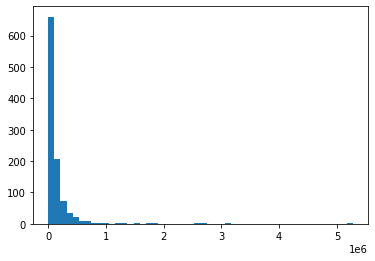

In [96]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [97]:
cross_val_score(model_lasso_cv, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-146476.99164607, -101478.81082156, -171475.24680105,
       -228727.92393453,  -78407.28977636])

### Ridge

In [98]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8353364880107639

In [99]:
cross_val_score(model_ridge, X, y, cv=5)

array([  0.79091685, -83.47632586,   0.78531354,   0.83164108,
        -2.86854223])

In [100]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [101]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  143742.92798683987
RMSE :  308203.58833202574
median absolut error :  79721.90978099033


In [102]:
MAE_ridge = mean_absolute_error(y_test,y_pred)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_ridge = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_ridge)
model_list.append("Ridge")
RMSE_list.append(RMSE_ridge)
median_abs_err_list.append(median_abs_err_ridge)

<function matplotlib.pyplot.show(close=None, block=None)>

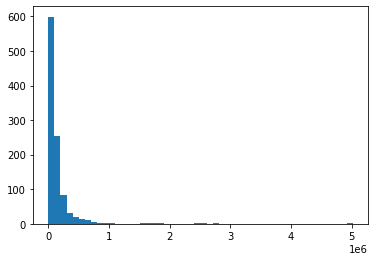

In [103]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [104]:
cross_val_score(model_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152870.57985798, -104750.25738684, -173102.62110546,
       -230752.12170093,  -67309.13474903])

### SVR

In [105]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### DecisionTreeClassifier

In [106]:
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(X_train,y_train)
score_decision_tree = model_decision_tree.score(X_test,y_test)
score_list.append(score_decision_tree)
score_decision_tree

0.2364341085271318

In [107]:
cross_val_score(model_decision_tree, X, y, cv=5)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.2751938 , 0.27934045, 0.27837051, 0.24442289, 0.20368574])

In [108]:
selector_tree = SelectFromModel(tree.DecisionTreeClassifier(),threshold='mean')
selector_tree.fit_transform(X,y)
selector_tree.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [109]:
y_pred = model_decision_tree.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  108165.44476744186
RMSE :  306412.7123023418
median absolut error :  25400.0


In [110]:
MAE_decision_tree = mean_absolute_error(y_test,y_pred)
RMSE_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_decision_tree = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_decision_tree)
model_list.append("Decision Tree \nClassifier")
RMSE_list.append(RMSE_decision_tree)
median_abs_err_list.append(median_abs_err_decision_tree)

<function matplotlib.pyplot.show(close=None, block=None)>

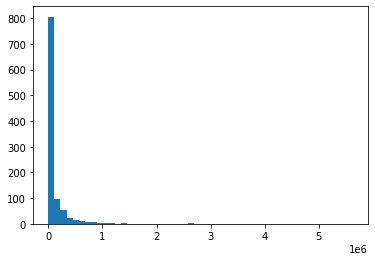

In [111]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [112]:
cross_val_score(model_decision_tree, X, y, cv=5, scoring='neg_mean_absolute_error')

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([-100704.21027132, -128527.2599418 , -101040.56644035,
       -125671.39670223, -125010.17458778])

### RandomForestClassifier

In [113]:
model_random_forest = RandomForestClassifier(n_estimators=10)
model_random_forest.fit(X_train,y_train)
score_random_forest = model_random_forest.score(X_test,y_test)
score_list.append(score_random_forest)
score_random_forest

0.20155038759689922

In [114]:
cross_val_score(model_random_forest, X, y, cv=5)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.23837209, 0.25897187, 0.23957323, 0.22987391, 0.15809893])

In [115]:
selector_random_forest = SelectFromModel(RandomForestClassifier(n_estimators=10),threshold='mean')
selector_random_forest.fit_transform(X,y)
selector_random_forest.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [116]:
y_pred = model_random_forest.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  168713.3042635659
RMSE :  501100.592167851
median absolut error :  40000.0


In [117]:
MAE_random_forest = mean_absolute_error(y_test,y_pred)
RMSE_random_forest = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_random_forest = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_random_forest)
model_list.append("Random Forest \nClassifier")
RMSE_list.append(RMSE_random_forest)
median_abs_err_list.append(median_abs_err_random_forest)

<function matplotlib.pyplot.show(close=None, block=None)>

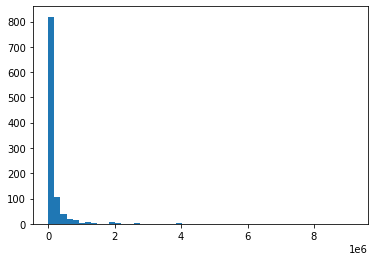

In [118]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [119]:
cross_val_score(model_random_forest, X, y, cv=5, scoring='neg_mean_absolute_error')

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([-143210.96705426, -162531.50048497, -152956.22017459,
       -156783.65373424, -153976.31328807])

### SGDClassifier

In [120]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### LogisticRegression

In [121]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### BayesianRidge

In [122]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.835817603950045

In [123]:
cross_val_score(model_bayesian, X, y, cv=5)

array([  0.79124067, -83.15788254,   0.78519372,   0.83313848,
        -2.8408571 ])

In [124]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [125]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  143423.52353916006
RMSE :  307753.0023812277
median absolut error :  81172.64573964104


In [126]:
MAE_bayesian = mean_absolute_error(y_test,y_pred)
RMSE_bayesian = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_bayesian = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_bayesian)
model_list.append("Bayesian \nRidge")
RMSE_list.append(RMSE_bayesian)
median_abs_err_list.append(median_abs_err_bayesian)

<function matplotlib.pyplot.show(close=None, block=None)>

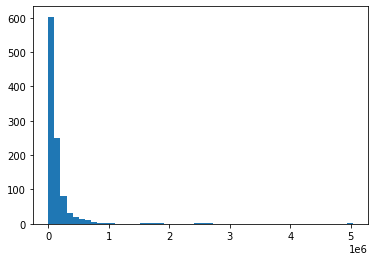

In [127]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [128]:
cross_val_score(model_bayesian, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-152360.45739838, -104372.53376239, -172908.89753049,
       -229786.7388412 ,  -67208.03672126])

### TweedieRegressor

In [129]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.8255721568876417

In [130]:
cross_val_score(model_tweedie, X, y, cv=5)

array([  0.79298073, -83.03996912,   0.77652359,   0.8257756 ,
        -3.21383296])

In [131]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False])

In [132]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))

MAE :  144794.79997631282
RMSE :  317210.028608015
median absolut error :  79052.60386107524


In [133]:
MAE_tweedie = mean_absolute_error(y_test,y_pred)
RMSE_tweedie = np.sqrt(mean_squared_error(y_test, y_pred))
median_abs_err_tweedie = median_absolute_error(y_test, y_pred)
MAE_list.append(MAE_tweedie)
model_list.append("Tweedie \nRegressor")
RMSE_list.append(RMSE_tweedie)
median_abs_err_list.append(median_abs_err_tweedie)

<function matplotlib.pyplot.show(close=None, block=None)>

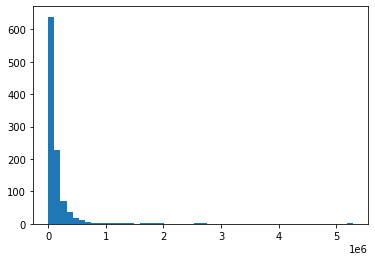

In [134]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [135]:
cross_val_score(model_tweedie, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-145828.00021741, -100390.98287401, -173406.23471127,
       -231204.7450746 ,  -76346.42446033])

# Comparaisons des modèles

### Résultats :

#### Précision 

Text(0, 0.5, 'Accuracy')

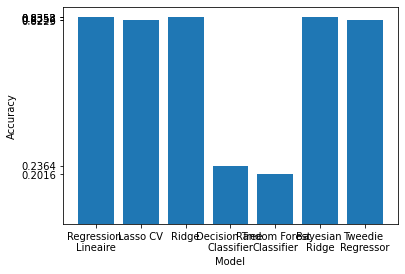

In [136]:
plt.bar(model_list, score_list)
plt.xticks(model_list)
plt.yticks(score_list)
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

Text(0, 0.5, 'Mean error')

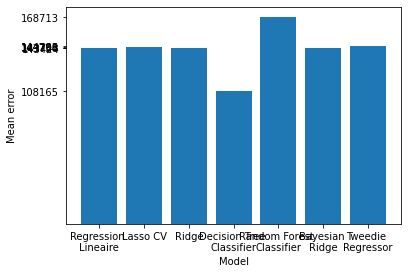

In [156]:
plt.bar(model_list, mean_error_list)
plt.xticks(model_list)
plt.yticks(mean_error_list)
plt.xlabel('Model')
plt.ylabel('Mean error')

Text(0, 0.5, 'MAE')

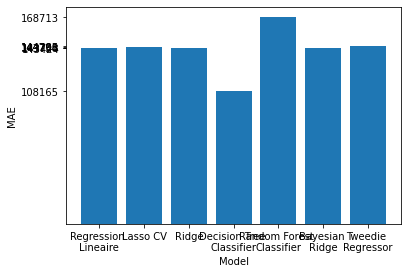

In [137]:
plt.bar(model_list, MAE_list)
plt.xticks(model_list)
plt.yticks(MAE_list)
plt.xlabel('Model')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

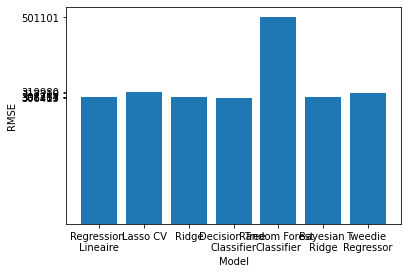

In [138]:
plt.bar(model_list, RMSE_list)
plt.xticks(model_list)
plt.yticks(RMSE_list)
plt.xlabel('Model')
plt.ylabel('RMSE')

Text(0, 0.5, 'Median Abs Error')

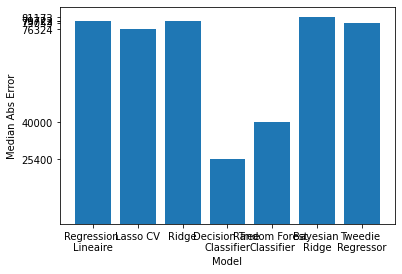

In [139]:
plt.bar(model_list, median_abs_err_list)
plt.xticks(model_list)
plt.yticks(median_abs_err_list)
plt.xlabel('Model')
plt.ylabel('Median Abs Error')

### Features : 

In [140]:
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [141]:
df[['Code Postal','Prix (Euros)']]

,Code Postal,Prix (Euros)
0,75017,830000
1,75015,1470000
2,75116,65000
3,75015,80000
4,75006,87000
...,...,...
5151,75015,240000
5152,75011,240000
5153,75009,240000
5154,75016,240000


In [142]:
print(df["Code Postal"].value_counts())
print(df.groupby('Code Postal')['Prix (Euros)'].mean())

75018    641
75015    542
75017    457
75016    356
75019    346
75020    335
75011    294
75014    282
75010    267
75013    265
75012    223
75009    181
75007    166
75008    142
75006    135
75005    122
75003     99
75004     96
75002     81
75116     75
75001     51
Name: Code Postal, dtype: int64
Code Postal
75001    9.001314e+05
75002    5.287049e+05
75003    8.346677e+05
75004    8.086822e+05
75005    5.969873e+05
75006    9.359901e+05
75007    1.341716e+06
75008    1.526422e+06
75009    7.078613e+05
75010    4.541537e+05
75011    4.523510e+05
75012    4.492317e+05
75013    4.583168e+05
75014    5.146743e+05
75015    5.331625e+05
75016    8.187319e+05
75017    5.701865e+05
75018    3.929556e+05
75019    4.305811e+05
75020    4.013520e+05
75116    1.585651e+06
Name: Prix (Euros), dtype: float64


In [143]:
print(df["Superficie (m2)"].value_counts())
print(df.groupby('Superficie (m2)')['Prix (Euros)'].mean())

38     136
18     122
36     117
42     116
8      107
      ... 
234      1
167      1
191      1
207      1
460      1
Name: Superficie (m2), Length: 232, dtype: int64
Superficie (m2)
0      3.306821e+05
5      6.220833e+04
6      6.961028e+04
7      8.612788e+04
8      8.968505e+04
           ...     
343    5.000000e+06
393    9.000000e+06
416    9.375000e+06
417    9.900000e+06
460    6.500000e+06
Name: Prix (Euros), Length: 232, dtype: float64


In [144]:
print(df["Nombre Pieces"].value_counts())
print(df.groupby('Nombre Pieces')['Prix (Euros)'].mean())

1    1807
2    1729
3     826
4     389
5     241
6     104
7      43
8      16
9       1
Name: Nombre Pieces, dtype: int64
Nombre Pieces
1    2.360460e+05
2    4.351077e+05
3    7.321619e+05
4    1.188376e+06
5    1.766525e+06
6    2.537125e+06
7    2.908506e+06
8    4.286250e+06
9    2.950000e+06
Name: Prix (Euros), dtype: float64


In [145]:
print(df["Nombre Chambres"].value_counts())
print(df.groupby('Nombre Chambres')['Prix (Euros)'].mean())

1    1869
0    1808
2     894
3     386
4     155
5      36
6       7
8       1
Name: Nombre Chambres, dtype: int64
Nombre Chambres
0    2.263572e+05
1    4.625808e+05
2    8.788953e+05
3    1.608067e+06
4    2.088253e+06
5    2.754493e+06
6    2.798571e+06
8    9.375000e+06
Name: Prix (Euros), dtype: float64


In [146]:
print(df["Classe Energetique"].value_counts())
print(df.groupby('Classe Energetique')['Prix (Euros)'].mean())

0    1773
5    1045
4     882
7     592
6     565
3     231
2      37
1      31
Name: Classe Energetique, dtype: int64
Classe Energetique
0    5.740742e+05
1    5.277629e+05
2    1.609062e+06
3    9.255952e+05
4    8.352301e+05
5    6.033470e+05
6    4.616431e+05
7    3.319739e+05
Name: Prix (Euros), dtype: float64


In [147]:
print(df["Nombre Photos"].value_counts())
print(df.groupby('Nombre Photos')['Prix (Euros)'].mean())

10    1810
6      557
7      529
8      522
9      496
5      429
4      348
3      212
1      133
2       98
0       22
Name: Nombre Photos, dtype: int64
Nombre Photos
0     575933.636364
1     468545.406015
2     460616.806122
3     305119.674528
4     334904.965517
5     352236.505828
6     433708.736086
7     435348.642722
8     500714.674330
9     619665.429435
10    905523.644199
Name: Prix (Euros), dtype: float64


In [148]:
print(df["Etage"].value_counts())
print(df.groupby('Etage')['Prix (Euros)'].mean())

 1    943
-1    893
 2    776
 3    675
 4    552
 6    525
 5    432
 7    256
 8     79
 9     25
Name: Etage, dtype: int64
Etage
-1    542669.108623
 1    599112.244963
 2    669194.319588
 3    717765.074074
 4    677237.128623
 5    753055.988426
 6    407597.754286
 7    368857.781250
 8    689422.025316
 9    667239.200000
Name: Prix (Euros), dtype: float64


In [149]:
print(df["Terrasse"].value_counts())
print(df.groupby('Terrasse')['Prix (Euros)'].mean())

-1    4410
 1     746
Name: Terrasse, dtype: int64
Terrasse
-1    568231.700227
 1    839366.749330
Name: Prix (Euros), dtype: float64


In [150]:
print(df["Parking"].value_counts())
print(df.groupby('Parking')['Prix (Euros)'].mean())

-1    4882
 1     274
Name: Parking, dtype: int64
Parking
-1    593648.938140
 1    853559.405109
Name: Prix (Euros), dtype: float64


In [151]:
print(df["Cave"].value_counts())
print(df.groupby('Cave')['Prix (Euros)'].mean())

-1    2787
 1    2369
Name: Cave, dtype: int64
Cave
-1    527426.451381
 1    701617.506543
Name: Prix (Euros), dtype: float64


In [152]:
print(df["Ascenseur"].value_counts())
print(df.groupby('Ascenseur')['Prix (Euros)'].mean())

-1    3234
 1    1922
Name: Ascenseur, dtype: int64
Ascenseur
-1    513086.389610
 1    766258.069199
Name: Prix (Euros), dtype: float64


In [153]:
print(df["Gardien"].value_counts())
print(df.groupby('Gardien')['Prix (Euros)'].mean())

-1    4014
 1    1142
Name: Gardien, dtype: int64
Gardien
-1    569760.076233
 1    739975.873030
Name: Prix (Euros), dtype: float64


In [154]:
print(df["Renove"].value_counts())
print(df.groupby('Renove')['Prix (Euros)'].mean())

-1    4882
 1     274
Name: Renove, dtype: int64
Renove
-1    604539.160795
 1    659522.664234
Name: Prix (Euros), dtype: float64


In [155]:
print(df["Box"].value_counts())
print(df.groupby('Box')['Prix (Euros)'].mean())

-1    5152
 1       4
Name: Box, dtype: int64
Box
-1    607220.767275
 1    917000.000000
Name: Prix (Euros), dtype: float64
